## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2020.04.07 11:59:00 AM**

### In this homework, you need to
- #### implement forward and backward for ConvLayer (`layers/conv_layer.py`)
- #### implement forward and backward for PoolingLayer (`layers/pooling_layer.py`)
- #### implement forward and backward for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [6]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [7]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [8]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][10]	 Batch [0][550]	 Training Loss 9.1981	 Accuracy 0.0500
Epoch [0][10]	 Batch [50][550]	 Training Loss 3.2422	 Accuracy 0.1851
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.5845	 Accuracy 0.2930
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.2387	 Accuracy 0.3634
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.0055	 Accuracy 0.4158
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.8325	 Accuracy 0.4578
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.6944	 Accuracy 0.4932
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.5875	 Accuracy 0.5213
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.4957	 Accuracy 0.5465
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.4207	 Accuracy 0.5681
Epoch [0][10]	 Batch [500][550]	 Training 

Epoch [8][10]	 Batch [200][550]	 Training Loss 0.2536	 Accuracy 0.9233
Epoch [8][10]	 Batch [250][550]	 Training Loss 0.2518	 Accuracy 0.9242
Epoch [8][10]	 Batch [300][550]	 Training Loss 0.2503	 Accuracy 0.9249
Epoch [8][10]	 Batch [350][550]	 Training Loss 0.2500	 Accuracy 0.9245
Epoch [8][10]	 Batch [400][550]	 Training Loss 0.2491	 Accuracy 0.9244
Epoch [8][10]	 Batch [450][550]	 Training Loss 0.2495	 Accuracy 0.9241
Epoch [8][10]	 Batch [500][550]	 Training Loss 0.2513	 Accuracy 0.9235

Epoch [8]	 Average training loss 0.2506	 Average training accuracy 0.9239
Epoch [8]	 Average validation loss 0.1868	 Average validation accuracy 0.9458

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.2529	 Accuracy 0.9400
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.2221	 Accuracy 0.9369
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.2387	 Accuracy 0.9298
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.2447	 Accuracy 0.9265
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.2405	 Accuracy 0.92

In [9]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9341.



## Plot

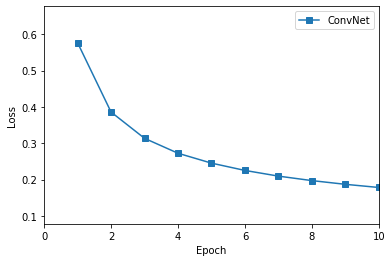

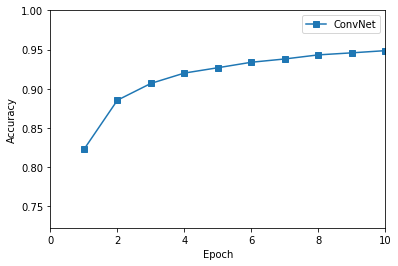

In [10]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

Epoch [0][10]	 Batch [0][550]	 Training Loss 8.2261	 Accuracy 0.1200
Epoch [0][10]	 Batch [50][550]	 Training Loss 4.1061	 Accuracy 0.1539
Epoch [0][10]	 Batch [100][550]	 Training Loss 3.3294	 Accuracy 0.2112
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.9116	 Accuracy 0.2564
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.6324	 Accuracy 0.2980
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.4206	 Accuracy 0.3349
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.2579	 Accuracy 0.3673
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.1341	 Accuracy 0.3918
Epoch [0][10]	 Batch [400][550]	 Training Loss 2.0278	 Accuracy 0.4149
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.9416	 Accuracy 0.4342
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.8673	 Accuracy 0.4512

Epoch [0]	 Average training loss 1.7993	 Average training accuracy 0.4682
Epoch [0]	 Average validation loss 0.9890	 Average validation accuracy 0.6844

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.0197	 Accuracy 0.7100


Epoch [8]	 Average training loss 0.4217	 Average training accuracy 0.8675
Epoch [8]	 Average validation loss 0.3315	 Average validation accuracy 0.8966

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.3830	 Accuracy 0.9000
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.3874	 Accuracy 0.8778
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.3984	 Accuracy 0.8772
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.4014	 Accuracy 0.8758
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.4014	 Accuracy 0.8761
Epoch [9][10]	 Batch [250][550]	 Training Loss 0.3997	 Accuracy 0.8767
Epoch [9][10]	 Batch [300][550]	 Training Loss 0.4003	 Accuracy 0.8764
Epoch [9][10]	 Batch [350][550]	 Training Loss 0.4022	 Accuracy 0.8755
Epoch [9][10]	 Batch [400][550]	 Training Loss 0.4024	 Accuracy 0.8756
Epoch [9][10]	 Batch [450][550]	 Training Loss 0.4022	 Accuracy 0.8753
Epoch [9][10]	 Batch [500][550]	 Training Loss 0.4039	 Accuracy 0.8747

Epoch [9]	 Average training loss 0.4022	 Average training accuracy 

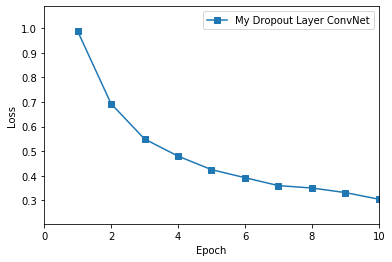

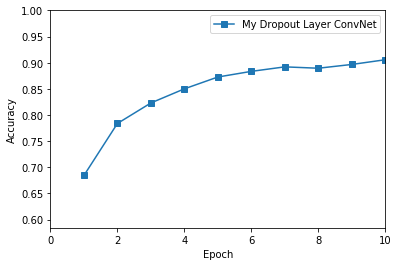

In [11]:
from layers import DropoutLayer

# set hyperparameters
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

# build your network
convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(DropoutLayer(0.2))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(DropoutLayer(0.2))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

# training
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# testing
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

# plot
plot_loss_and_acc({'My Dropout Layer ConvNet': [conv_loss, conv_acc]})